In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time

# Set up

In [ ]:
d = 3

# R(m)

In [ ]:
def C_frown(d):
  if d >=3:
    term1 = (d/2-1) / (2*(1-2**(1-d/2)))
    term2 = 1 + 1/(2*(d/2-1))
    return 2*term1**(2/d)*term2

def R(m, d=d, c=C_frown(d)):
  if d >= 3:
    return np.minimum(c / m**(1/d), 1)

# r-box

<ipython-input-3-23135860e9e2>:9: RuntimeWarning: divide by zero encountered in divide
  return np.minimum(c / m**(1/d), 1)


L= 0.1 , mim err: 0.1199874735603194 , attained at r= 0.3
L= 0.3 , mim err: 0.20783727668934215 , attained at r= 0.17500000000000002
L= 1 , mim err: 0.3794074778626585 , attained at r= 0.095
L= 0.1 , mim err: 0.14534114061522496 , attained at k= 112201
L= 0.3 , mim err: 0.24964616331854245 , attained at k= 22387
L= 1 , mim err: 0.44853108589384383 , attained at k= 3548


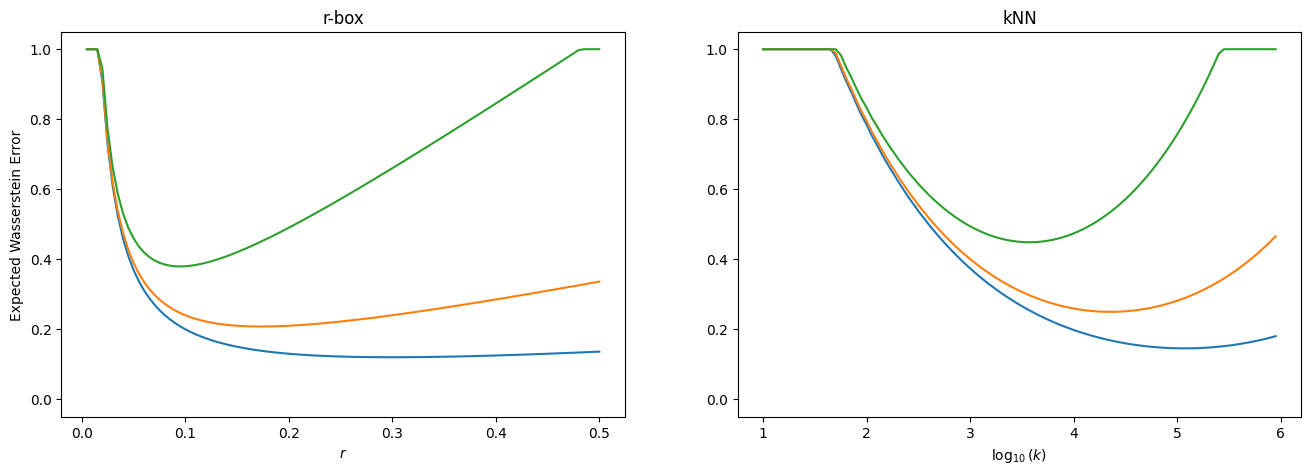

This cell takes 0.6649169921875 seconds.


In [ ]:
time_start = time.time()

d_X = 3
d_Y = 3
M = int(1e6)
c=C_frown(d_Y)
uncertn = 1


L_vec = [0.1, 0.3, 1]

fig = plt.figure(figsize=[16,5])
gs = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot r-box
n_MCsamples = 1000
n_r = 100
r_vec = (np.arange(n_r) / n_r + 1/n_r) / 2
E_W_err_mat = np.zeros([len(L_vec), n_r])

for i_ell in range(len(L_vec)):
  L = L_vec[i_ell]
  for i_r in range(n_r):
    r = r_vec[i_r]
    p = (2*r)**d_X
    binomial_samples = np.random.binomial(M, p, size=n_MCsamples)
    R_samples = R(binomial_samples, d=d_Y, c=c) * uncertn
    E_W_err_mat[i_ell, i_r] = np.minimum(2*L*r + np.average(R_samples),1)
  ax1.plot(r_vec, E_W_err_mat[i_ell], label='L='+str(L))
  arg_min = np.argmin(E_W_err_mat[i_ell])
  print("L=", L, ", mim err:", E_W_err_mat[i_ell,arg_min], ", attained at r=", r_vec[arg_min])
ax1.set_ylim([-0.05,1.05])
ax1.set_title("r-box")
ax1.set_ylabel("Expected Wasserstein Error")
ax1.set_xlabel("$r$")

# Plot kNN
n_k = 100
k_0 = 10
log_k_vec = np.log(k_0) + np.arange(n_k) * (np.log(M)-np.log(k_0)) / n_k
E_W_err_mat = np.zeros([len(L_vec), n_k])

sums = np.cumsum(np.cumsum((1 + np.arange(M))**(1/d_X-1)))

for i_ell in range(len(L_vec)):
  L = L_vec[i_ell]
  for i_k in range(n_k):
    k = np.minimum(int(np.exp(log_k_vec[i_k])),M)
    W_err = R(k, d=d_Y, c=c) * uncertn + 2*L/k/d_X*M**(-1/d_X)*sums[k-1]
    E_W_err_mat[i_ell, i_k] = np.minimum(W_err,1)
  ax2.plot(log_k_vec/np.log(10), E_W_err_mat[i_ell], label='L='+str(L))
  arg_min = np.argmin(E_W_err_mat[i_ell])
  print("L=", L, ", mim err:", E_W_err_mat[i_ell,arg_min], ", attained at k=", int(np.exp(log_k_vec[arg_min])))
ax2.set_ylim([-0.05,1.05])
ax2.set_title("kNN")
ax2.set_xlabel("$\log_{10}(k)$")

# ax1.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1), fancybox=False, shadow=False, ncol=10, fontsize='xx-large')


plt.show()

time_end = time.time()
print("This cell takes", time_end-time_start, "seconds.")

# k-NN

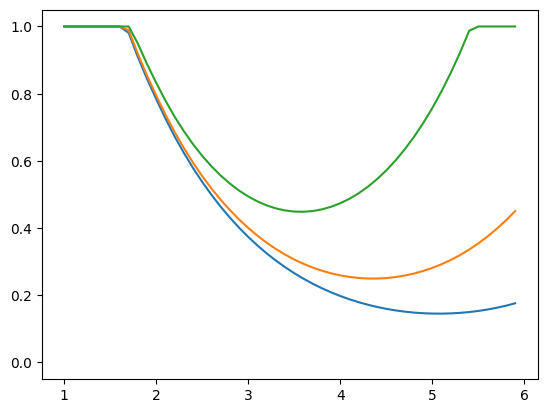

This cell takes 0.8586721420288086 seconds.


In [ ]:
time_start = time.time()

d_X = 3
d_Y = 3
M = int(1e6)
c=C_frown(d_Y)
uncertn = 1

sums = np.cumsum(np.cumsum((1 + np.arange(M))**(1/d_X-1)))

L_vec = [0.1, 0.3, 1]
n_k = 50
k_0 = 10
log_k_vec = np.log(k_0) + np.arange(n_k) * (np.log(M)-np.log(k_0)) / n_k
E_W_err_mat = np.zeros([len(L_vec), n_k])

plt.figure()
for i_ell in range(len(L_vec)):
  L = L_vec[i_ell]
  for i_k in range(n_k):
    k = np.minimum(int(np.exp(log_k_vec[i_k])),M)
    W_err = R(k, d=d_Y, c=c) * uncertn + 2*L/k/d_X*M**(-1/d_X)*sums[k-1]
    E_W_err_mat[i_ell, i_k] = np.minimum(W_err,1)
  plt.plot(log_k_vec/np.log(10), E_W_err_mat[i_ell])
plt.ylim([-0.05,1.05])
plt.show()


time_end = time.time()
print("This cell takes", time_end-time_start, "seconds.")